In [2]:
from createFeatures import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
df = create_features()

MySQL Database connection successful
Fetch all successful
Fetch all successful
	Closed connection


In [4]:
df

,census_tract_id,LILATract_1And10,state,county,num_restaurants,min_calories,max_calories,mean_calories,min_protein,max_protein,...,mean_carbs,num_price_level_1,num_price_level_2,num_price_level_3,num_price_level_4,num_rating_less_2,num_rating_2_to_4,num_rating_great_4,avg_rating_total,total_ratings_count
0,34001000200,0,New Jersey,Atlantic County,28,350.00,509.67,402.609286,14.00,22.86,...,33.872500,9,13,5,1,0,28,19,4.210714,17654.0
1,34001000300,0,New Jersey,Atlantic County,31,271.38,509.67,400.042903,10.75,22.86,...,33.805484,10,14,5,2,0,31,22,4.203226,40403.0
2,34001001100,0,New Jersey,Atlantic County,27,174.50,477.00,372.790370,3.50,23.11,...,33.227778,12,8,5,2,0,27,21,4.211111,50402.0
3,34001001200,0,New Jersey,Atlantic County,26,153.00,478.40,380.088846,3.00,24.60,...,32.425769,9,10,4,3,0,26,17,4.126923,36480.0
4,34001001400,0,New Jersey,Atlantic County,15,358.40,483.00,403.232667,11.70,27.29,...,30.140667,1,7,6,1,0,15,8,4.113333,13785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,34007602902,0,New Jersey,Camden County,15,236.00,438.56,355.130667,6.00,20.44,...,34.642667,12,3,0,0,0,15,9,4.166667,5630.0
66,34007603001,0,New Jersey,Camden County,30,236.00,557.67,378.801333,6.00,24.89,...,34.410333,24,6,0,0,0,30,18,4.060000,10328.0
67,34007603002,0,New Jersey,Camden County,28,236.00,557.67,394.370357,6.00,26.00,...,34.313571,24,4,0,0,0,28,17,4.032143,10907.0
68,34007603100,0,New Jersey,Camden County,18,258.78,514.22,367.707222,7.50,24.89,...,34.932222,13,5,0,0,0,18,9,4.016667,8794.0


In [8]:
df = df.drop(columns='num_rating_less_2')

Correlation Matrix

In [9]:
matrix = df.corr().round(2)

C:\Users\chels\AppData\Local\Temp\ipykernel_22808\152468336.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr().round(2)


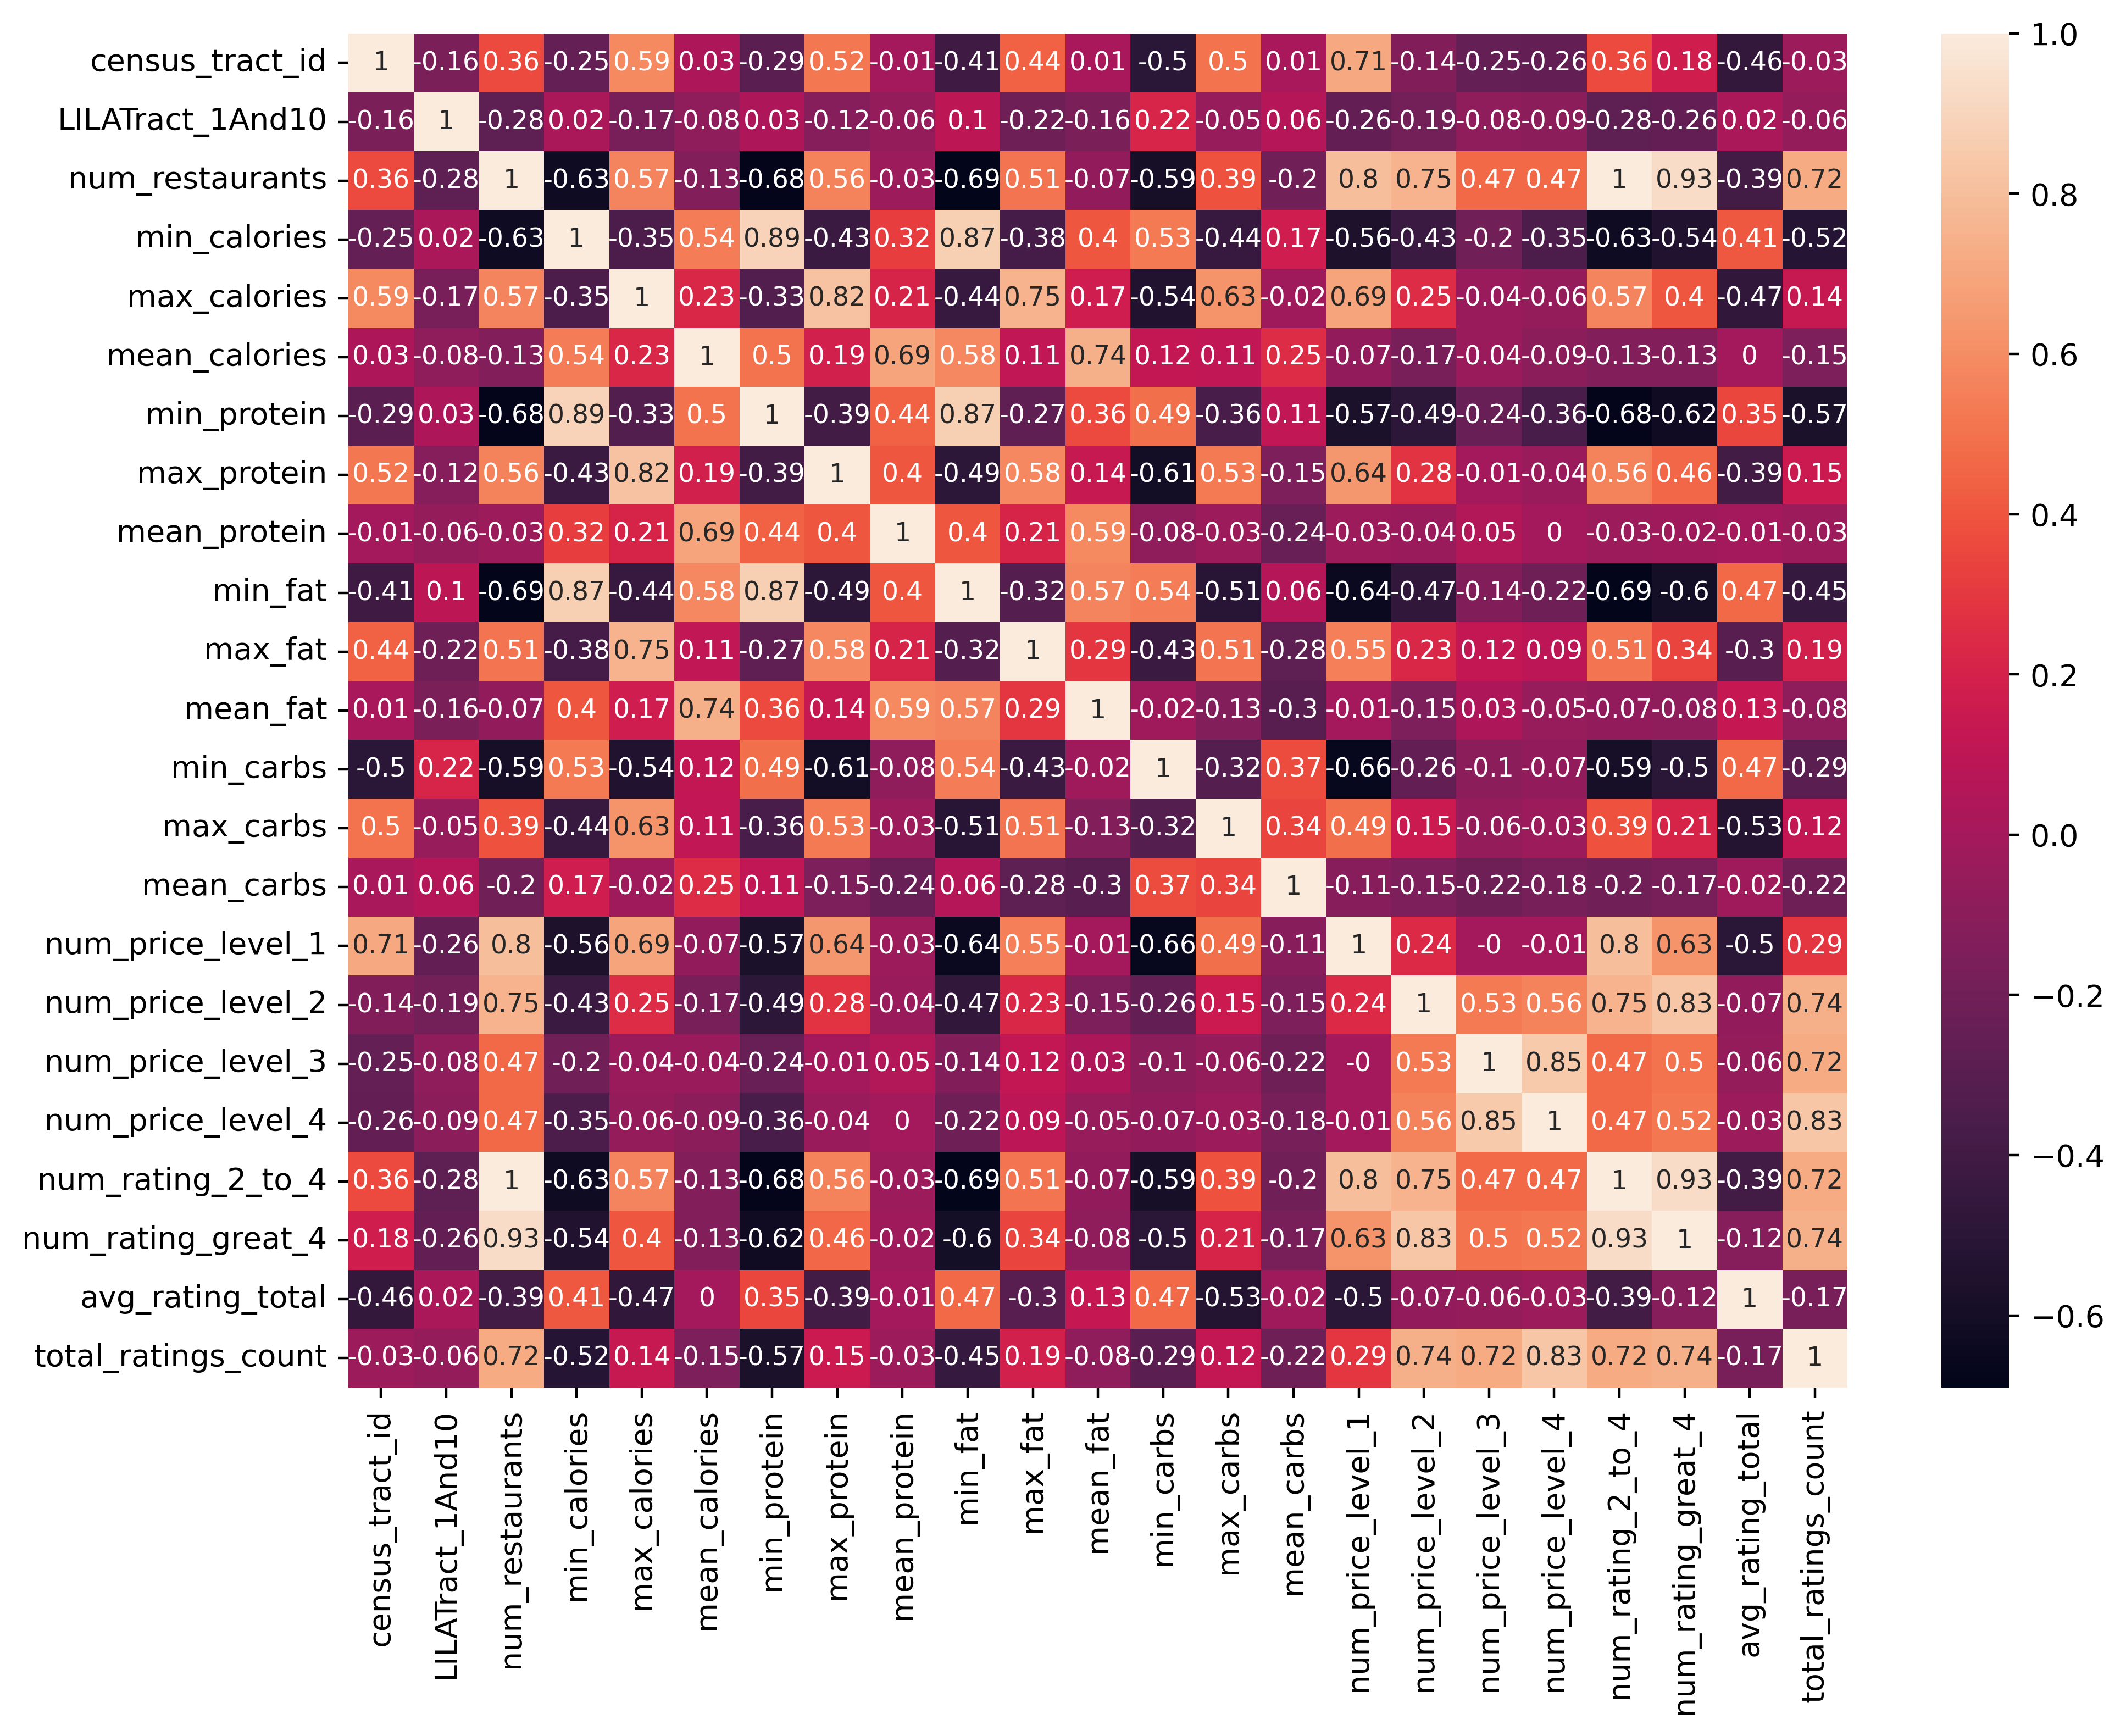

In [10]:
figure(figsize=(11, 8), dpi=400)
sns.heatmap(matrix, annot=True, annot_kws={'size': 8.5})
plt.show()

In [7]:
df.dtypes

census_tract_id          int64
LILATract_1And10         int64
state                   object
county                  object
num_restaurants          int64
min_calories           float64
max_calories           float64
mean_calories          float64
min_protein            float64
max_protein            float64
mean_protein           float64
min_fat                float64
max_fat                float64
mean_fat               float64
min_carbs              float64
max_carbs              float64
mean_carbs             float64
num_price_level_1        int64
num_price_level_2        int64
num_price_level_3        int64
num_price_level_4        int64
num_rating_less_2        int64
num_rating_2_to_4        int64
num_rating_great_4       int64
avg_rating_total       float64
total_ratings_count    float64
dtype: object

Visualize PCA with all variables

In [29]:
# https://plotly.com/python/pca-visualization/
import plotly.express as px

#features = ['max_calories', 'max_protein', 'max_carbs', 'max_fat', 'num_price_level_2', 'avg_rating_total']
# features = ['num_restaurants', 'min_calories', 'min_fat', 'min_protein', 
#             'min_carbs', 'num_rating_2_to_4', 'num_price_level_1', 'num_price_level_2',
#             'total_ratings_count']

features = ['min_protein', 'mean_protein', 'min_fat', 'mean_fat', 'num_rating_2_to_4']


fig = px.scatter_matrix(
      df,
      dimensions=features,
      color="LILATract_1And10"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["LILATract_1And10"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

Distributions

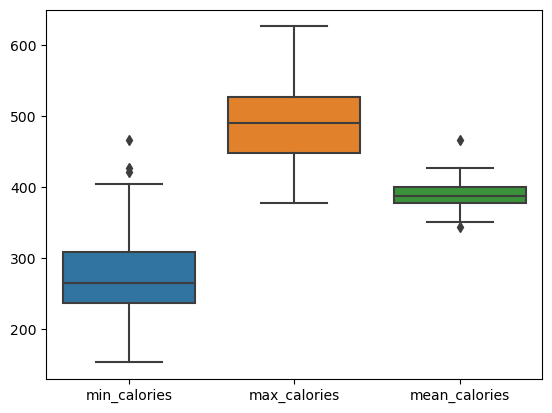

In [13]:
features = ['min_calories', 'max_calories', 'mean_calories']
sns.boxplot(data=df[features])
plt.show()

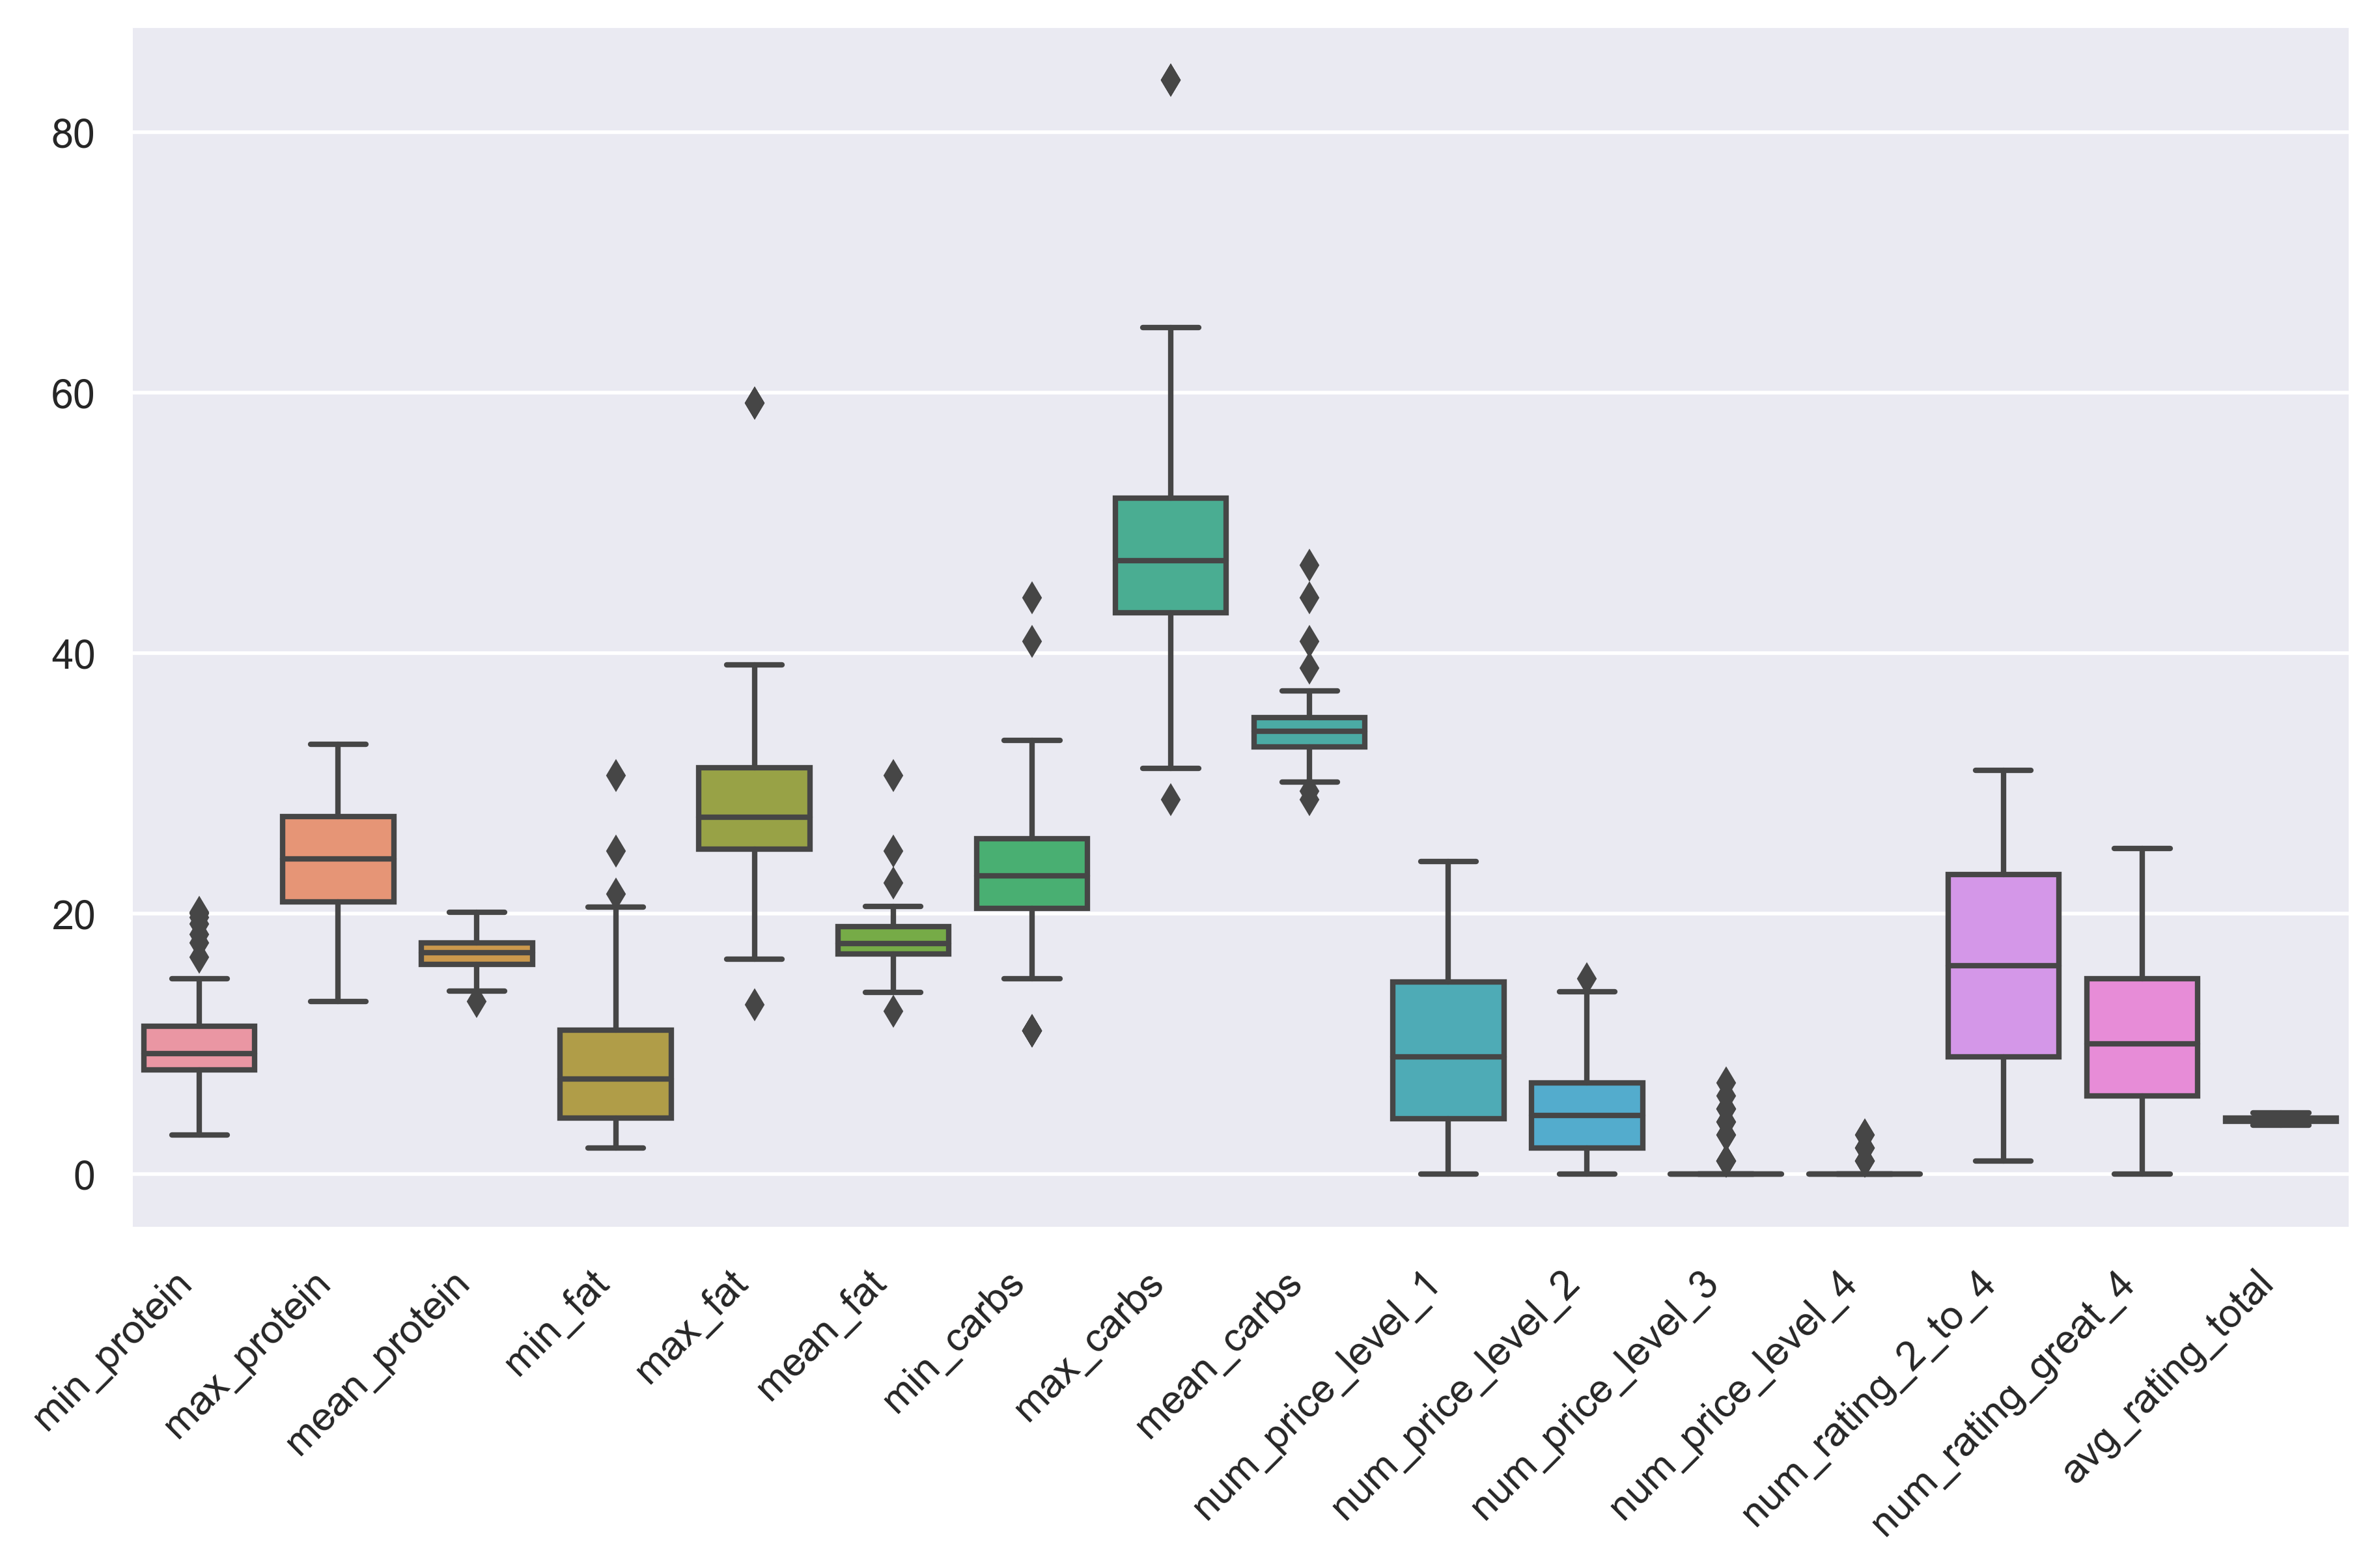

In [14]:
features = ['min_protein', 'max_protein', 'mean_protein', 
            'min_fat', 'max_fat', 'mean_fat', 
            'min_carbs', 'max_carbs', 'mean_carbs', 
            'num_price_level_1', 'num_price_level_2', 'num_price_level_3', 
            'num_price_level_4', 'num_rating_2_to_4', 
            'num_rating_great_4', 'avg_rating_total']
figure(figsize=(11, 6), dpi=400)
sns.set(font_scale = 1)
chart = sns.boxplot(data=df[features])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

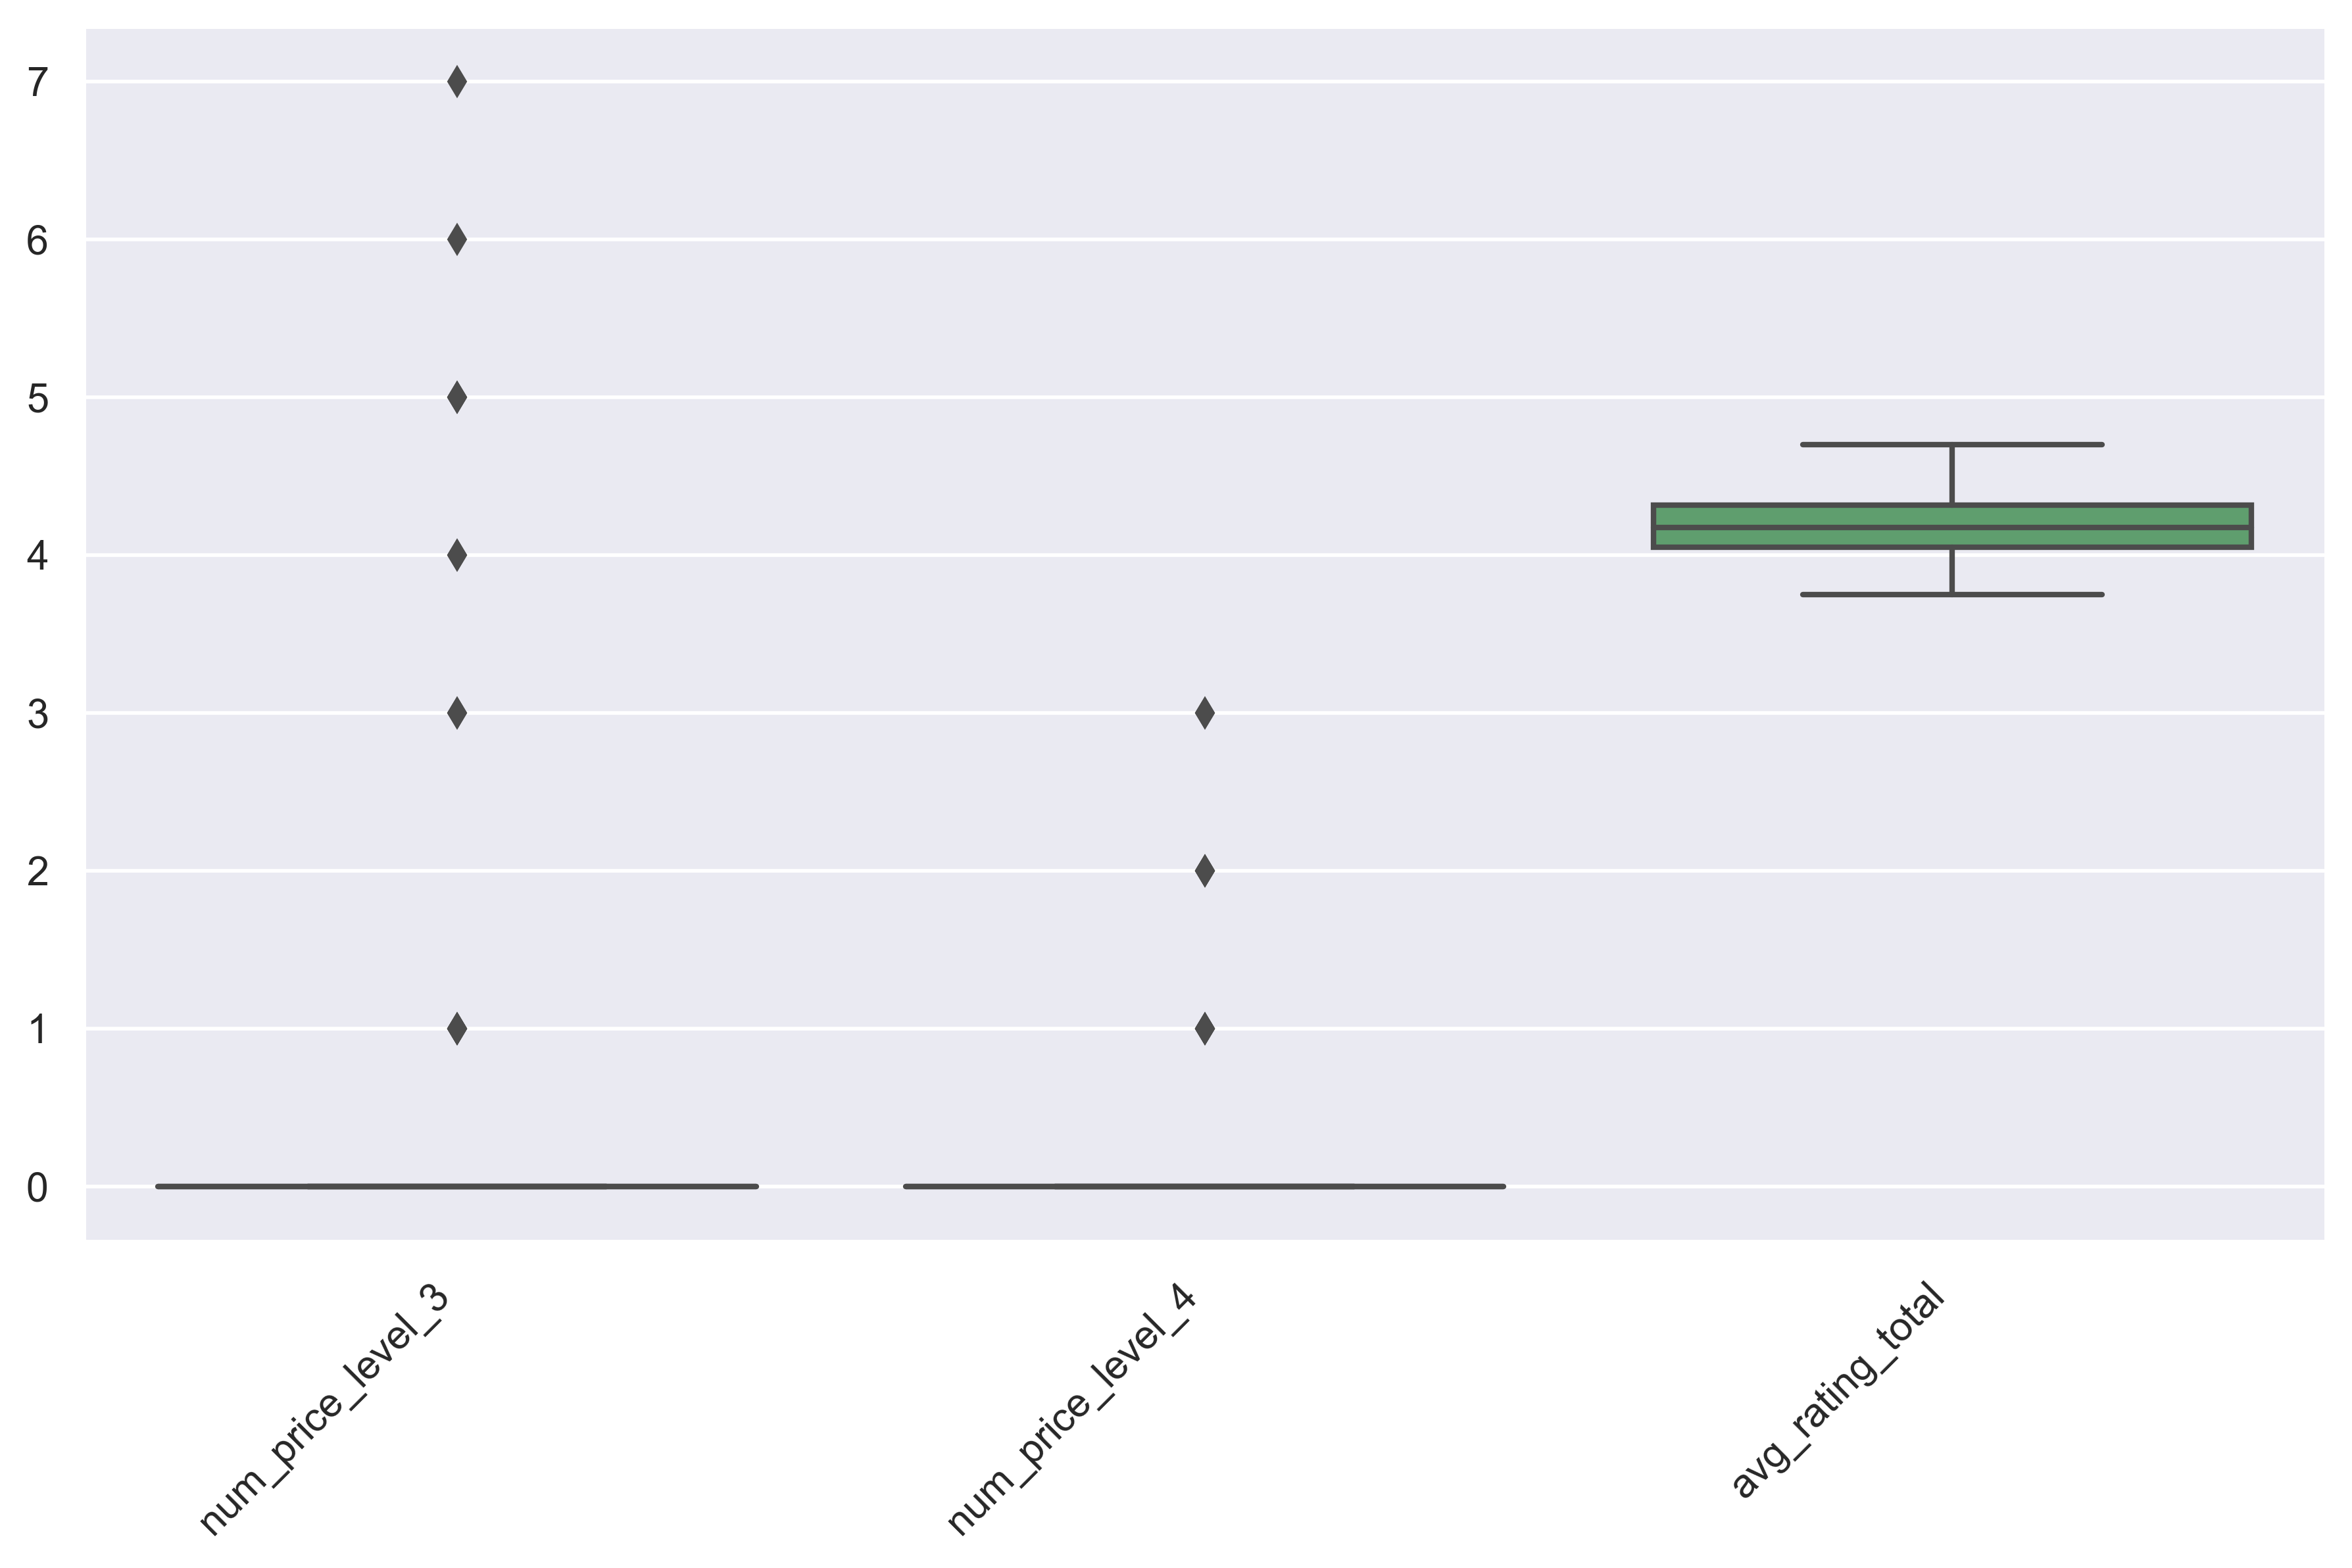

In [15]:
features = ['num_price_level_3', 
            'num_price_level_4', 'avg_rating_total']
figure(figsize=(11, 6), dpi=400)
sns.set(font_scale = 1)
chart = sns.boxplot(data=df[features])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

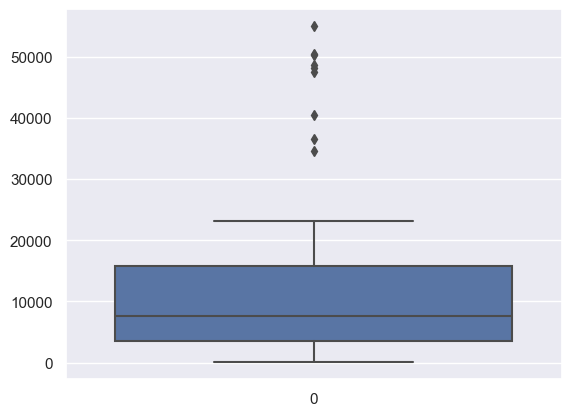

In [16]:
sns.boxplot(data=df['total_ratings_count'])
plt.show()

In [24]:
# Best Features

# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from createFeatures import *

df = create_features()
target = 'LILATract_1And10'
features = ['num_restaurants', 'min_calories', 'max_calories', 'mean_calories',
       'min_protein', 'max_protein', 'mean_protein', 'min_fat', 'max_fat',
       'mean_fat', 'min_carbs', 'max_carbs', 'mean_carbs', 'num_price_level_1',
       'num_price_level_2', 'num_price_level_3', 'num_price_level_4',
       'num_rating_2_to_4', 'num_rating_great_4',
       'avg_rating_total', 'total_ratings_count']

X = df[features]
y = df[target]

MySQL Database connection successful
Fetch all successful
Fetch all successful
	Closed connection


In [27]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C:\Users\chels\Anaconda3\envs\chels\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\chels\Anaconda3\envs\chels\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\chels\Anaco

Num Features: 5
Selected Features: [False False False False  True False  True  True False  True False False
 False False False False False  True False False False]
Feature Ranking: [ 5 13 10 12  1 11  1  1  8  1  3  4  2 15  7  6 14  1  9 16 17]


C:\Users\chels\Anaconda3\envs\chels\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\chels\Anaconda3\envs\chels\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\chels\Anaco

In [28]:
print([x for i,x in enumerate(features) if fit.support_[i]==True])

['min_protein', 'mean_protein', 'min_fat', 'mean_fat', 'num_rating_2_to_4']
